# Informe TP1

1) Ejercicio 1    

In [1]:
import matplotlib.pyplot as plt
import numpy as np

* Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [65]:
multiplicador = 1013904223
incremento = 1664525
modulo = pow(2,32)

semilla = ((102140 + 102361 + 102216 + 98316) / 4 ) - 0.25

anterior_a = semilla
def gcl_a():
    global anterior_a
    anterior_a = (multiplicador *  anterior_a + incremento) % modulo
    return anterior_a

for i in range(1, 10):
    v = gcl_a()
    print(v)

3312200771.0
2852875264.0
1507490304.0
637185024.0
4049811968.0
2952391680.0
4040948224.0
2617846784.0
2219096576.0


* Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [67]:
cota = 4294967295
def gcl_b():
    return gcl_a() / cota

anterior_a = semilla
for i in range(1, 10):
    v = gcl_b()
    print(v)

0.7711818376023281
0.664236784135978
0.35098993786400884
0.14835619929906824
0.9429203274061252
0.687407255332779
0.9408565761849416
0.6095149518478464
0.5166736842404757


* Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

461312.0
4294234624.0
0.07525749891599529
3994361629.032959


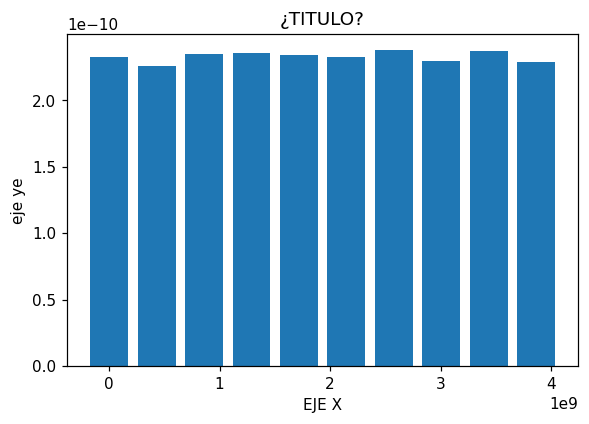

In [63]:
plt.figure( dpi=110)

m=10000
nros_a=[]
nros_b=[]
v= semilla

for i in range(0,m):
    v = gcl_a(v)
    nros_a.append(v)

# Se graficará un histograma determinando por la cantidad de clases por regla de Sturges:
# import math
# xMin = min(nros_a)
# xMax = max(nros_a)

# print(xMin)
# print(xMax)

# log = math.log(2,len(nros_a))
# print(log)
# ancho = (4294967295)/(1+log)
# print(ancho)
# cantidad_de_clases = int((xMax)/ancho)
# bins = int((4294967295)/ancho)
plt.hist(nros_a,10,align="left",rwidth=0.8,density=True)

plt.ylabel("eje ye")
plt.xlabel("EJE X")
plt.title('¿TITULO?')
plt.show()


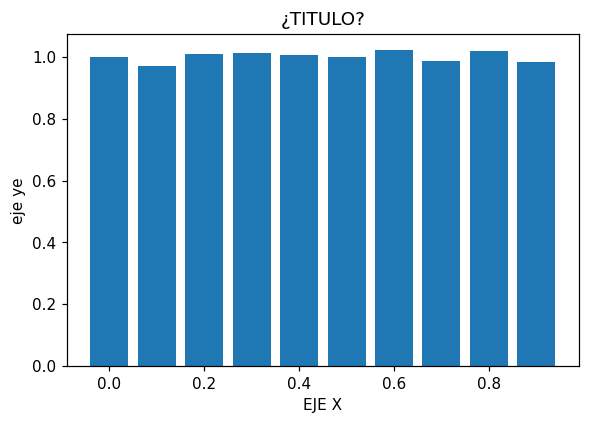

In [5]:
plt.figure( dpi=110)
m=10000
nros_b=[]
v = semilla

for i in range(0,m):
    v = gcl_b(v)
    nros_b.append(v)
    
plt.hist(nros_b,10,align="left",rwidth=0.8,density=True)
plt.ylabel("eje ye")
plt.xlabel("EJE X")
plt.title('¿TITULO?')
plt.show()

* Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore 𝑥𝑖+1 = ( 𝑥𝑖−24 + 𝑥𝑖−55) 𝑚𝑜𝑑 2 24
    Donde 𝑥0,𝑥1, … , 𝑥54 son números arbitrarios no todos iguales.

In [6]:
m=55
nros=[]
v = semilla

for i in range(0,m):
    v = gcl_a(v)
    nros.append(v)

def agregacion_por_Mitchell_Moore(array):
    v = (array[len(array) - 32] + array[len(array) - 55]) % pow(2, 24)
    array.append(v)
    return v


for i in range(1, 10):
    print(agregacion_por_Mitchell_Moore(nros))

3102787.0
5645824.0
3991040.0
1975808.0
7661056.0
15083008.0
11331072.0
11412992.0
15001088.0


* Ejercicio 2

    Para cada uno de los generadores del ejercicio 1, proponer, y realizar, al menos 2 tests para evaluar su comportamiento. 
    Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.

* Ejercicio 3

    Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes
    generadores de números al azar:
    
    a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp
    
    b) Alguno de los generadores de números al azar implementados con el algoritmo del ejercicio 1.
    
    c) Calcule el factor de rendimiento del método.

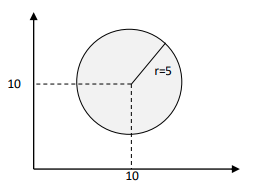

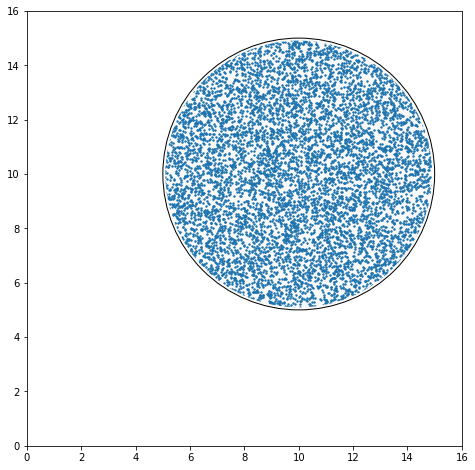

In [86]:
x_result = []
y_result = []
for i in range(1, 10000):    
    x = np.random.uniform(low=5, high=15)
    y = np.random.uniform(low=5, high=15)
    if pow(x-10, 2)+pow(y-10,2)<=25:
        x_result.append(x)
        y_result.append(y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
    
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

circle = Circle(
    (10, 10),
    radius=5,
    clip_on=False,
    zorder=10,
    linewidth=1,
    edgecolor='black',
    facecolor=(0, 0, 0, 0.0125),
    path_effects=[withStroke(linewidth=5, foreground='w')],
)
ax.add_artist(circle)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_ylim(ymax=16)
ax.set_xlim(xmax=16)
plt.scatter(x_result, y_result, s = 2)
plt.show()


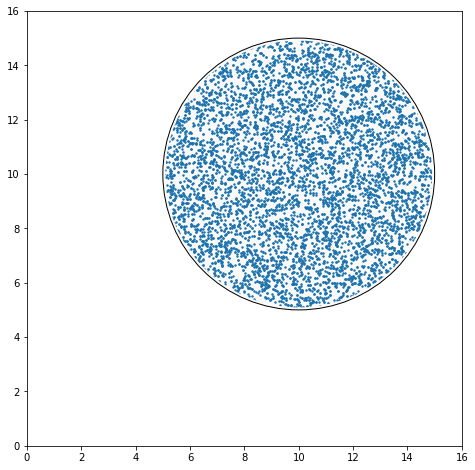

In [88]:
x_result = []
y_result = []
anterior_a = semilla
for i in range(1, 10000):    
    x = (gcl_b()*10)+5
    y = (gcl_b()*10)+5
    if pow(x-10, 2)+pow(y-10,2)<=25:
        x_result.append(x)
        y_result.append(y)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
    
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

circle = Circle(
    (10, 10),
    radius=5,
    clip_on=False,
    zorder=10,
    linewidth=1,
    edgecolor='black',
    facecolor=(0, 0, 0, 0.0125),
    path_effects=[withStroke(linewidth=5, foreground='w')],
)
ax.add_artist(circle)

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_ylim(ymax=16)
ax.set_xlim(xmax=16)
plt.scatter(x_result, y_result, s = 2)
plt.show()


* Asumiendo que las variables x e y siguen una distribucion uniforme y que son independientes entre ellas, entonces el factor de rendimiento del metodo se calcula como:
    
    factor =  area del circulo / area posible
    
    donde el area posible es el area delimitada por el cuadrado de lados de largo 10 en los intervalos x entre 5 y 15 e y entre 5 y 15

    

* Ejercicio 4

    Para la siguiente densidad de probabilidad, se pide:

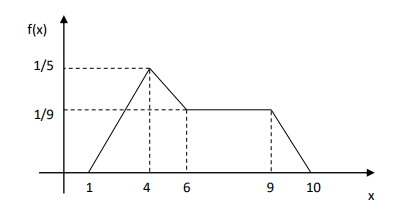

* Definir la función de densidad de probabilidad.

La funcion de densidad de probabilidad es: 
    f(x) =  0                 si 0 <= x < 1
            (1/15 x - 1/15)   si 1 <= x < 4
            (-2/45 x + 17/45) si 4 <= x < 6
            1/9               si 6 <  x < 9
            (-1/9 x + 10/9)   si 9 <  x < 10

* Calcular y graficar la función de probabilidad acumulada y su inversa.

* Utilizando el generador de números aleatorios implementado en el ítem b del ejercicio 1, genere números al azar
con la distribución propuesta.

* Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

<Figure size 432x288 with 0 Axes>

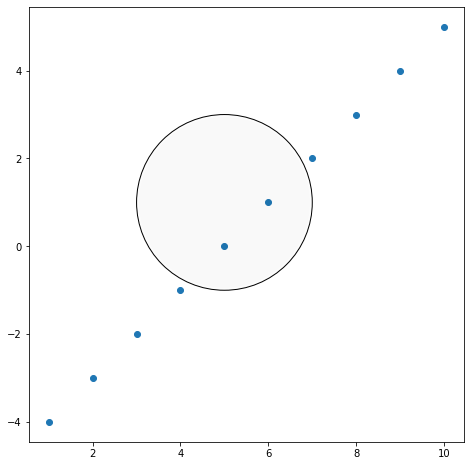

In [31]:
# circulo

plt.figure()
x = []
y = []
for i in range(1,11):
    x.append(i)
    y.append(i-5)

    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
    
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

circle = Circle(
    (5, 1),
    radius=2,
    clip_on=False,
    zorder=10,
    linewidth=1,
    edgecolor='black',
    facecolor=(0, 0, 0, 0.0125),
    path_effects=[withStroke(linewidth=5, foreground='w')],
)
ax.add_artist(circle)


plt.scatter(x, y)
plt.show()